# Support Vector Machines (SVMs) using scikit-learn in Python - Project Overview
### Let's tain and deploy SVMs on another dataset from UCI Machine Learning Repository 
### [Statlog (Australian Credit Approval) Data Set ](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29)<br>

This real dataset concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. <br>

You can download the datafile from the UCI website or use the one which is processed and provided in the course material. Later on, you can download the file from UCI website and do the data cleaning your self for practice your skills. <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Read the datafile and display the head of your dataframe**

In [8]:
df = pd.read_csv("Aust_Credit_Approval_Data.csv")

In [14]:
#Code here please, so that you dont lose the output

print(df.head())

      x1     x2  x3  x4  x5     x6  x7  x8  x9  x10  x11  x12   x13  target
0  22.08  11.46   2   4   4  1.585   0   0   0    1    2  100  1213       0
1  22.67   7.00   2   8   4  0.165   0   0   0    0    2  160     1       0
2  29.58   1.75   1   4   4  1.250   0   0   0    1    2  280     1       0
3  21.67  11.50   1   5   3  0.000   1   1  11    1    2    0     1       1
4  20.17   8.17   2   6   4  1.960   1   1  14    0    2   60   159       1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [15]:
#Code here please, so that you dont lose the output

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      690 non-null    float64
 1   x2      690 non-null    float64
 2   x3      690 non-null    int64  
 3   x4      690 non-null    int64  
 4   x5      690 non-null    int64  
 5   x6      690 non-null    float64
 6   x7      690 non-null    int64  
 7   x8      690 non-null    int64  
 8   x9      690 non-null    int64  
 9   x10     690 non-null    int64  
 10  x11     690 non-null    int64  
 11  x12     690 non-null    int64  
 12  x13     690 non-null    int64  
 13  target  690 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 75.6 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
x1        690 non-null float64
x2        690 non-null float64
x3        690 non-null int64
x4        690 non-null int64
x5        690 non-null int64
x6        690 non-null float64
x7        690 non-null int64
x8        690 non-null int64
x9        690 non-null int64
x10       690 non-null int64
x11       690 non-null int64
x12       690 non-null int64
x13       690 non-null int64
target    690 non-null int64
dtypes: float64(3), int64(11)
memory usage: 75.5 KB


In [16]:
#Code here please, so that you dont lose the output

df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


Let's move on to machine learning. 
## Machine Learning 

** Do the train test split, use test_size .30 and default value of random state at the moment**

In [17]:
#Code here please, so that you dont lose the output

from sklearn.model_selection import train_test_split

In [19]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (483, 13)
Testing set size: (207, 13)


Training set size: (483, 13)
Testing set size: (207, 13)


### Importing and  training the Support Vector Classifier

**Import SVC and create its instance `svm_model`**

In [7]:
#Code here please, so that you dont lose the output

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [10]:
X = df.drop("target", axis=1)
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

svm_model = SVC()

svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


**train the model please** 

In [13]:
#Code here please, so that you dont lose the output
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

svm_model = SVC()

svm_model.fit(X_train, y_train)

print("SVM model trained successfully")


SVM model trained successfully


**Do the predictions please** 

In [16]:
#Code here please, so that you dont lose the output
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

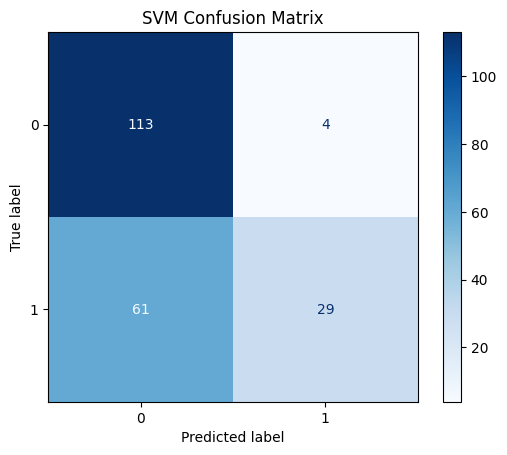

In [25]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()


**How the calculate the score?**

In [30]:
#Code here please, so that you dont lose the output

FORMULA: Accuracy= Total Number of Predictions / Number of Correct Predictions

In [22]:
# Using scikit-learn score() method (already have svm_model trained)
accuracy = svm_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.6473429951690821


In [23]:
# Using accuracy_score explicitly
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6473429951690821


In [24]:
# other metrics like precision, recall, F1-score for more detailed evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75       117
           1       0.77      0.27      0.40        90

    accuracy                           0.65       207
   macro avg       0.70      0.60      0.57       207
weighted avg       0.69      0.65      0.60       207



The model is improved after GridSearch but the prediction are not great. In the profession setup, you try different strategies including feature engineering along with using different models to see which one works best for your data. This section is specifically for the SVMs to learn how the model work and how to improve its performance.
# Excellent work!